# Ridge Regression

This is a method we can use to fit a regression model when multicollinearity is present in the data

Least Squared Regression tries to minimize the sum of squared residuals (RSS)

Conversely, ridge regression seeks to minimize RSS + shrinkage penalty

In ridge regression, we select a value of lambda that produces lowest possible test mean squared error

In [15]:
import pandas as pd
import numpy as np
from numpy import arange
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold

In [16]:
#define URL where data is located
url = "https://raw.githubusercontent.com/Statology/Python-Guides/main/mtcars.csv"

#read in data
data_full = pd.read_csv(url)

#select subset of data
data = data_full[["mpg", "wt", "drat", "qsec", "hp"]]

#view first six rows of data
data[0:6]

,mpg,wt,drat,qsec,hp
0,21.0,2.620,3.90,16.46,110
1,21.0,2.875,3.90,17.02,110
2,22.8,2.320,3.85,18.61,93
3,21.4,3.215,3.08,19.44,110
4,18.7,3.440,3.15,17.02,175
5,18.1,3.460,2.76,20.22,105


In [17]:
#define predictor and response variables
X = data[["mpg", "wt", "drat", "qsec"]]
y = data["hp"]

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

#define model
model = RidgeCV(alphas=arange(0.01, 1, 0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X, y)

RidgeCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
        scoring='neg_mean_absolute_error')

In [18]:
#define new observation
new = [24, 2.5, 3.5, 18.5]

#predict hp value using ridge regression model
pred = model.predict(X)

In [19]:
model.alpha_

0.99

In [20]:
# define new observation
new = [24,2.5,3.5,18.5]

# predict hp value using ridge regression regression model
model.predict([new])

/home/devangm/.local/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


array([104.16398018])

In [21]:
y.shape

(32,)

# Plotting

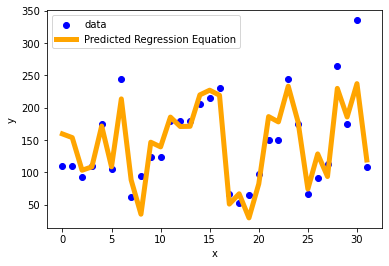

In [23]:
figure1 = plt.figure()

x_train=np.arange(0,len(X),1)

plt.scatter(x_train, y, label='data', color='blue')
plt.plot(x_train, pred, label='Predicted Regression Equation', color='orange', linewidth=5.0)

plt.xlabel('x')
plt.ylabel('y')

plt.legend()
plt.show()